# Biodiversity
## Codecademy portfolio project

### Reading the files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [3]:
obs= pd.read_csv('observations.csv')
species= pd.read_csv('species_info.csv')

In [4]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Analysis

<Axes: title={'center': 'Species by Category'}, xlabel='category'>

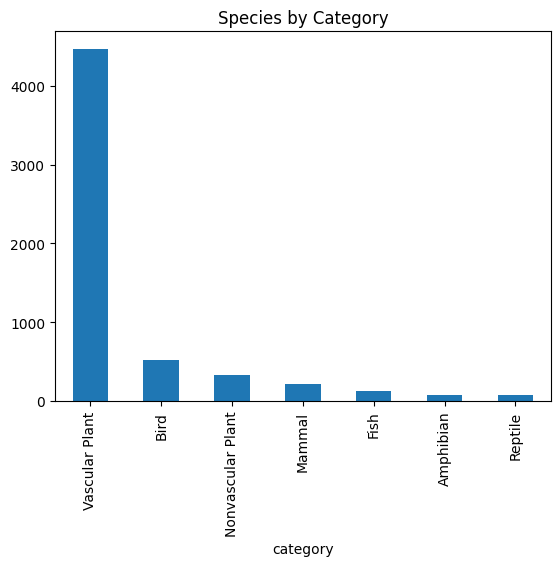

In [6]:
species.groupby('category').size().sort_values(ascending=False).plot(kind='bar', title='Species by Category')

<Axes: title={'center': 'Conservation Status'}, xlabel='conservation_status'>

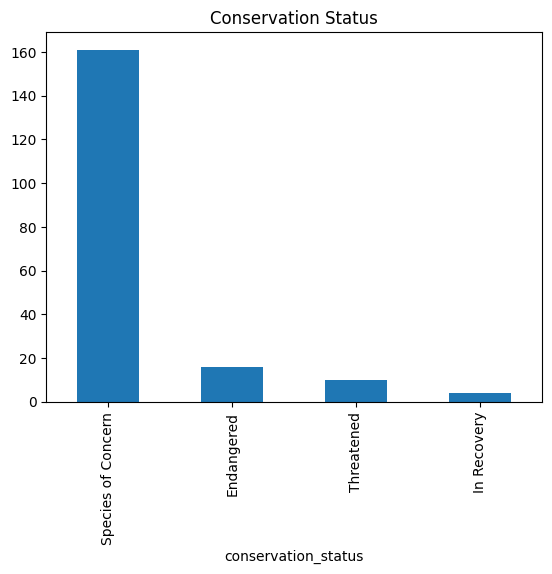

In [8]:
species['conservation_status'].value_counts(dropna=True).plot(kind='bar', title='Conservation Status')

There appears to be a large number of missing data in the column conservation_status in the species dataset. Let's dig deeper into that.
Missing values in this category mean that animals most likely not need intervention and can be left to their own devices.

In [9]:
species.fillna('No Intervention', inplace=True)

In [10]:
species[species['conservation_status']!= 'No Intervention'].groupby(['conservation_status', 'category']).scientific_name.nunique().unstack()

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


In [11]:
# Create a new column that is True if conservation_status is not equal to 'No Intervention', and False otherwise.
species['is_protected'] = species['conservation_status'] != 'No Intervention'

# Group the species data by the category and is_protected columns and count the unique scientific_names in each grouping.
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

# Examine category_counts using head()
category_counts.head()


,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [12]:
# Examine category_counts using pivot()
category_pivot = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

# Examine category_pivot
category_pivot

is_protected,category,False,True
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [13]:
# Rename the categories
category_pivot.columns = ['category', 'not_protected', 'protected']

# Create a new column of category_pivot that is the percent of protected species
category_pivot['percent_protected'] = category_pivot['protected'] / (category_pivot['protected'] + category_pivot['not_protected'])

# Examine category_pivot
category_pivot


,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


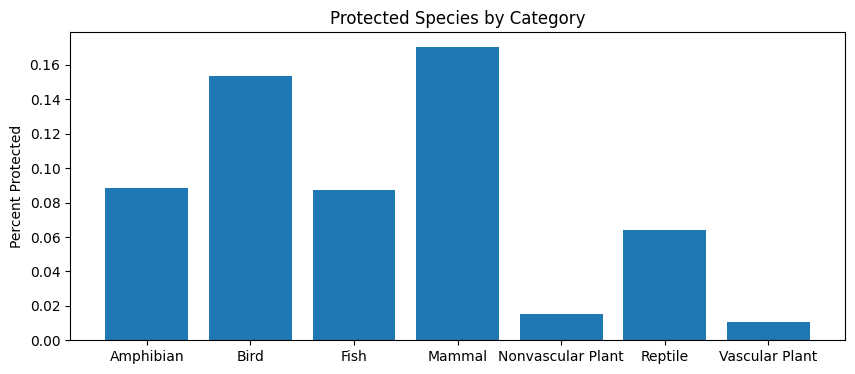

In [14]:
#Data visualization
plt.figure(figsize=(10, 4))
ax = plt.subplot()
plt.bar(range(len(category_pivot)), category_pivot['percent_protected'])
ax.set_xticks(range(len(category_pivot)))
ax.set_xticklabels(category_pivot['category'])
plt.ylabel('Percent Protected')
plt.title('Protected Species by Category')
plt.show()

In [15]:
# Significance Test
from scipy.stats import chi2_contingency

contingency = [[30, 146], [75, 413]]

chi2, pval, dof, expected = chi2_contingency(contingency)

print(pval)

#Observations
#Mammals are more likely to be endangered than birds

0.6875948096661336
